# I. Import Modul

<i>Melakukan import modul pandas, numpy dan juga matplotlib. Chained assignment pada pandas dinon-aktifkan dan format pandas secara global untuk angka diubah menjadi :,.2f</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from jupyterthemes import jtplot

# menonaktifkan chained assignment pada pandas
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format

# setting dpi matplotlib
mpl.rcParams['figure.dpi']= 150
%config InlineBackend.figure_format = 'retina'

# setting tema jupyter untuk plotting
jtplot.style(theme='monokai')

# II. Membaca dan merubah format data pada DataFrame

<i>Data yang digunakan dalam analisa ini adalah data penjualan PT Panatrade Caraka 2021 - 2022 (cut off bulan Maret 2022).</i>

In [34]:
data = pd.concat(map(pd.read_csv, ['Sales2022.csv', 'Sales2021.csv']))
data.drop(['%'], axis=1)
data

c:\users\johan\appdata\local\programs\python\python37\lib\site-packages\pandas\core\reshape\concat.py:304: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,


Art                              Desc. Category Quantity  \
0       P10737-41           DERBY-BLACK/ORANGE/WHITE    FWEAR        6   
1       P30179-43        NEOWAVE-BLACK/PHANTOM/WHITE    FWEAR        3   
2       P30200-43                VX-WAVE-BLACK/WHITE    FWEAR        4   
3       P20824-40          CITY RACE-NAVY/GREY/WHITE    FWEAR        2   
4       P30178-45          NEOWAVE-OLIVE/BLACK/WHITE    FWEAR        2   
...           ...                                ...      ...      ...   
115015  401594-39  LIGHTSPEED 3 IN-SILVER/BLACK/AQUA    FWEAR        1   
115016  401594-41  LIGHTSPEED 3 IN-SILVER/BLACK/AQUA    FWEAR        4   
115017  401594-43  LIGHTSPEED 3 IN-SILVER/BLACK/AQUA    FWEAR        2   
115018  401594-42  LIGHTSPEED 3 IN-SILVER/BLACK/AQUA    FWEAR        4   
115019  401594-44  LIGHTSPEED 3 IN-SILVER/BLACK/AQUA    FWEAR        1   

               Bruto           Net          Cogs      Profit       %  season  \
0       2,278,800.00  1,595,160.00  1,237,968.00  357,192.00  30.00%    2021   
1       1,049,400.00    734,580.00    542,407.68  192,172.32  30.00%    2021   
2       1,399,200.00    979,440.00    676,760.36  302,679.64  30.00%    2021   
3         759,600.00    531,720.00    380,929.44  150,790.56  30.00%    2021   
4         699,600.00    489,720.00    361,605.12  128,114.88  30.00%    2021   
...              ...           ...           ...         ...     ...     ...   
115015    579,800.00    388,466.00    238,600.66  149,865.34     NaN    2021   
115016  2,319,200.00  1,553,864.00    954,402.64  599,461.36     NaN    2021   
115017  1,159,600.00    776,932.00    477,201.32  299,730.68     NaN    2021   
115018  2,319,200.00  1,553,864.00    954,402.64  599,461.36     NaN    2021   
115019    579,800.00    388,466.00    238,600.66  149,865.34     NaN    2021   

        brand  categ  loc                          customer sportcast  \
0       PIERO  FWEAR  DMA  CARI SEPATU - YOGYAKARTA ( CBD )        LS   
1       PIERO  FWEAR  DMA  CARI SEPATU - YOGYAKARTA ( CBD )        AC   
2       PIERO  FWEAR  DMA  CARI SEPATU - YOGYAKARTA ( CBD )        LS   
3       PIERO  FWEAR  DMA  CARI SEPATU - YOGYAKARTA ( CBD )        ES   
4       PIERO  FWEAR  DMA  CARI SEPATU - YOGYAKARTA ( CBD )        AC   
...       ...    ...  ...                               ...       ...   
115015  SPECS  FWEAR  DMA     SPORT CITY - MERAUKE ( CASH )        FS   
115016  SPECS  FWEAR  DMA     SPORT CITY - MERAUKE ( CASH )        FS   
115017  SPECS  FWEAR  DMA     SPORT CITY - MERAUKE ( CASH )        FS   
115018  SPECS  FWEAR  DMA     SPORT CITY - MERAUKE ( CASH )        FS   
115019  SPECS  FWEAR  DMA     SPORT CITY - MERAUKE ( CASH )        FS   

                inv  Id Cust  period month        date  
0        PDF2200001  104C016       1   JAN   1/10/2022  
1        PDF2200001  104C016       1   JAN   1/10/2022  
2        PDF2200001  104C016       1   JAN   1/10/2022  
3        PDF2200001  104C016       1   JAN   1/10/2022  
4        PDF2200001  104C016       1   JAN   1/10/2022  
...             ...      ...     ...   ...         ...  
115015  SDF2109093L  109S002      12   DEC  12/31/2021  
115016  SDF2109093L  109S002      12   DEC  12/31/2021  
115017  SDF2109093L  109S002      12   DEC  12/31/2021  
115018  SDF2109093L  109S002      12   DEC  12/31/2021  
115019  SDF2109093L  109S002      12   DEC  12/31/2021  

[171313 rows x 20 columns]

In [61]:
# Merubah dtype beberapa kolom dari object menjadi float64
data.Quantity = data.Quantity.str.replace(',','').astype(float)
data.Bruto = data.Bruto.str.replace(',','').astype(float)
data.Net = data.Net.str.replace(',','').astype(float)
data.Cogs = data.Cogs.str.replace(',','').astype(float)
data.Profit = data.Profit.str.replace(',','').astype(float)
data.dtypes

Art           object
Desc.         object
Category      object
Quantity     float64
Bruto        float64
Net          float64
Cogs         float64
Profit       float64
%             object
season         int64
brand         object
categ         object
loc           object
customer      object
sportcast     object
inv           object
Id Cust       object
period         int64
month         object
date          object
dtype: object

Berdasarkan data yang diberikan, masih terdapat redundancy pada customer name ('customer') untuk customer code ('Id Cust'). Hal ini dapat dilihat dari jumlah unique 'customer' pada beberapa 'Id Cust' yang nilainya lebih dari 1 seperti dapat dilihat di bawah. Maka dengan demikian beberapa grouping yang akan menggunakan irisan customer akan lebih terkonsentrasi menggunakan 'Id Cust' ketimbang 'customer'.

In [32]:
data.nunique()

Art           9848
Desc.         2080
Category        16
Quantity       407
Bruto         3687
Net           9984
Cogs         21091
Profit       37753
%              150
season          11
brand            6
categ           16
loc              9
customer       416
sportcast       21
inv          22900
Id Cust        245
period          12
month           12
date           260
dtype: int64

In [55]:
cust_map = data[['Id Cust', 'customer']].groupby(['Id Cust']).nunique()
with pd.option_context('display.max_rows', None):
    print(cust_map)

          customer
Id Cust           
1.01E+07         1
1.01E+08         1
1.02E+11         1
1.04E+04         1
1.04E+07         1
101A005          1
101A026          1
101B001          1
101B003          2
101B010          5
101B013          2
101B014          3
101B021          1
101B022          2
101B023          2
101B024          1
101C006          2
101C008          1
101D003          2
101D010          3
101D012          2
101F003          3
101F008          1
101F015          1
101G012          4
101G016          1
101G017          1
101G018          1
101G019          2
101I007          1
101I020          2
101K003          1
101K011          3
101K012          2
101K013          2
101K015          1
101L003          2
101M007          2
101M011          1
101M017          1
101M018          6
101M020          2
101N003          2
101N004          2
101N010          1
101P001          1
101R004          1
101R007          1
101S003          1
101S005          2
101S007     

# III. Memilih data

In [62]:
# Memilih data secara spesifik
data_terpilih = data[['Art', 'Quantity', 'Bruto', 'Net', 'Cogs', 'Profit', 'brand', 'Id Cust', 'date']]

## I. Perhitungan diskon

$
\begin{align}
disc = \frac{bruto - net}{bruto}
\end{align}
$

In [63]:
data_terpilih['discount'] = (data_terpilih['Bruto'] - data_terpilih['Net']) / data_terpilih['Bruto']

Terdapat data dengan nilai penjualan bruto sama dengan 0 yang menyebabkan munculnya error pada kolom discount atau infinite karena melakukan pembagian terhadap 0. Seperti dapat dilihat dari data_terpilih.describe() di bawah ini yang menunjukkan bahwa mean dan juga min dari kolom discount adalah -inf. Oleh karena itu pada cell selanjutnya kita akan melakukan drop terhadap baris data dengan penjualan bruto 0.

In [64]:
# Informasi dasar data_terpilih
print(data_terpilih.describe())

        Quantity          Bruto            Net           Cogs         Profit  \
count 154,597.00     171,313.00     171,313.00     171,313.00     171,313.00   
mean        9.78   3,111,268.39   1,841,946.12   1,309,281.74     532,664.38   
std        54.13   8,759,950.09   4,701,602.82   3,788,418.82   1,371,973.05   
min         0.00           0.00           0.00    -535,306.27 -22,692,737.43   
25%         2.00     599,600.00     401,732.00     285,579.97     119,555.14   
50%         3.00   1,199,400.00     802,708.00     537,390.93     255,447.66   
75%         6.00   2,699,400.00   1,679,160.00   1,160,406.00     535,229.16   
max     7,800.00 499,600,000.00 262,290,000.00 184,894,004.50  94,125,000.00   

        discount  
count 171,132.00  
mean        -inf  
std          NaN  
min         -inf  
25%         0.32  
50%         0.33  
75%         0.35  
max         0.99  


In [95]:
data_terpilih = data_terpilih[data_terpilih['Bruto'] != 0]
print(data_terpilih.describe())

        Quantity          Bruto            Net           Cogs         Profit  \
count 154,427.00     171,111.00     171,111.00     171,111.00     171,111.00   
mean        9.79   3,114,941.31   1,844,120.57   1,310,824.45     533,296.13   
std        54.16   8,764,466.57   4,703,950.97   3,790,388.00   1,372,659.13   
min         1.00      18,800.00       2,480.00    -535,306.27 -22,692,737.43   
25%         2.00     599,600.00     401,732.00     287,976.00     119,801.08   
50%         3.00   1,199,400.00     802,928.00     537,787.67     255,684.92   
75%         6.00   2,699,400.00   1,679,160.00   1,161,573.86     535,494.84   
max     7,800.00 499,600,000.00 262,290,000.00 184,894,004.50  94,125,000.00   

        discount  
count 171,111.00  
mean        0.36  
std         0.10  
min         0.00  
25%         0.32  
50%         0.33  
75%         0.35  
max         0.99  


### I.1 Pengelompokan dan penjumlahan Net Sales berdasarkan Tingkat Diskon

In [65]:
net_berdasar_disc = data_terpilih[['discount', 'Net']].groupby(['discount']).sum()

#### I.1.a Informasi Net Sales berdasar pengelompokan Tingkat Diskon

In [66]:
print(net_berdasar_disc.sort_values(by='Net', ascending=False))

                        Net
discount                   
0.33     126,162,836,738.00
0.30      44,996,197,540.00
0.35      21,525,777,390.00
0.60      14,228,292,880.00
0.38      13,850,137,096.00
...                     ...
0.95              10,000.00
0.96              10,000.00
0.90              10,000.00
0.87              10,000.00
-inf                 366.00

[184 rows x 1 columns]


In [67]:
print(net_berdasar_disc.describe())

                     Net
count             184.00
mean    1,714,941,932.65
std    10,129,005,290.52
min               366.00
25%           142,500.00
50%         4,456,218.40
75%       101,802,958.75
max   126,162,836,738.00


### I.2 Pengelompokan dan penjumlahan Net Sales berdasarkan Customer

In [68]:
net_berdasar_cust = data_terpilih[['Id Cust', 'Net']].groupby(['Id Cust']).sum()

#### I.2.a Total nilai Net Sales

In [69]:
net_berdasar_cust.sum()

Net   315,549,315,607.38
dtype: float64

#### 1.2.b Informasi Net Sales berdasar pengelompokan Customer

In [70]:
print(net_berdasar_cust.describe())

                    Net
count            245.00
mean   1,287,956,390.23
std    3,500,093,886.88
min        1,724,310.00
25%       48,970,404.00
50%      260,185,844.00
75%    1,152,303,050.00
max   33,215,857,709.38


<i>Berikut adalah kontribusi net sales YTD 2022 untuk customer dengan total nilai net sales di atas nilai rata - rata net sales dari semua customer (kecuali PT Prestasi Retail Innovation - 220P001)</i>

In [74]:
# Menslice customer dengan total nilai Net Sales di atas rata - rata Net Sales
cust_diatas_rerata = net_berdasar_cust.loc[(net_berdasar_cust['Net'] > net_berdasar_cust['Net'].mean()) & 
                                           (net_berdasar_cust.index != "220P001")].sort_values(by=['Net'], ascending=False)
print(cust_diatas_rerata)

                      Net
Id Cust                  
104A019 33,215,857,709.38
105A009 15,053,579,006.00
101G012 14,088,376,392.00
101I020 11,067,166,691.00
101M018  7,047,927,334.00
101K003  6,669,570,861.00
104C004  6,245,634,824.00
102S008  6,205,098,896.00
102L004  6,009,977,114.00
102G006  5,753,896,112.00
101D010  4,789,772,508.00
102S009  4,762,256,172.00
107M002  4,569,436,229.00
104S016  4,475,859,454.00
102A014  4,438,285,694.00
101G018  4,294,862,706.00
101S014  4,144,980,272.80
101B022  3,929,282,598.00
102M014  3,882,382,342.00
112A002  3,827,238,880.00
105O004  3,711,964,650.00
101F003  3,686,297,694.00
102S015  3,540,796,637.40
102A004  3,303,002,758.00
101S005  3,082,882,980.00
102O004  3,075,436,960.00
112A003  3,047,100,000.00
103P001  3,042,706,430.00
104J003  2,531,031,906.00
101K011  2,526,747,656.00
108W001  2,484,064,726.00
101K013  2,459,719,241.00
102I001  2,389,999,074.00
101M020  2,343,047,496.00
101F015  2,201,501,334.00
105J006  2,101,659,734.00
101D003  2,0

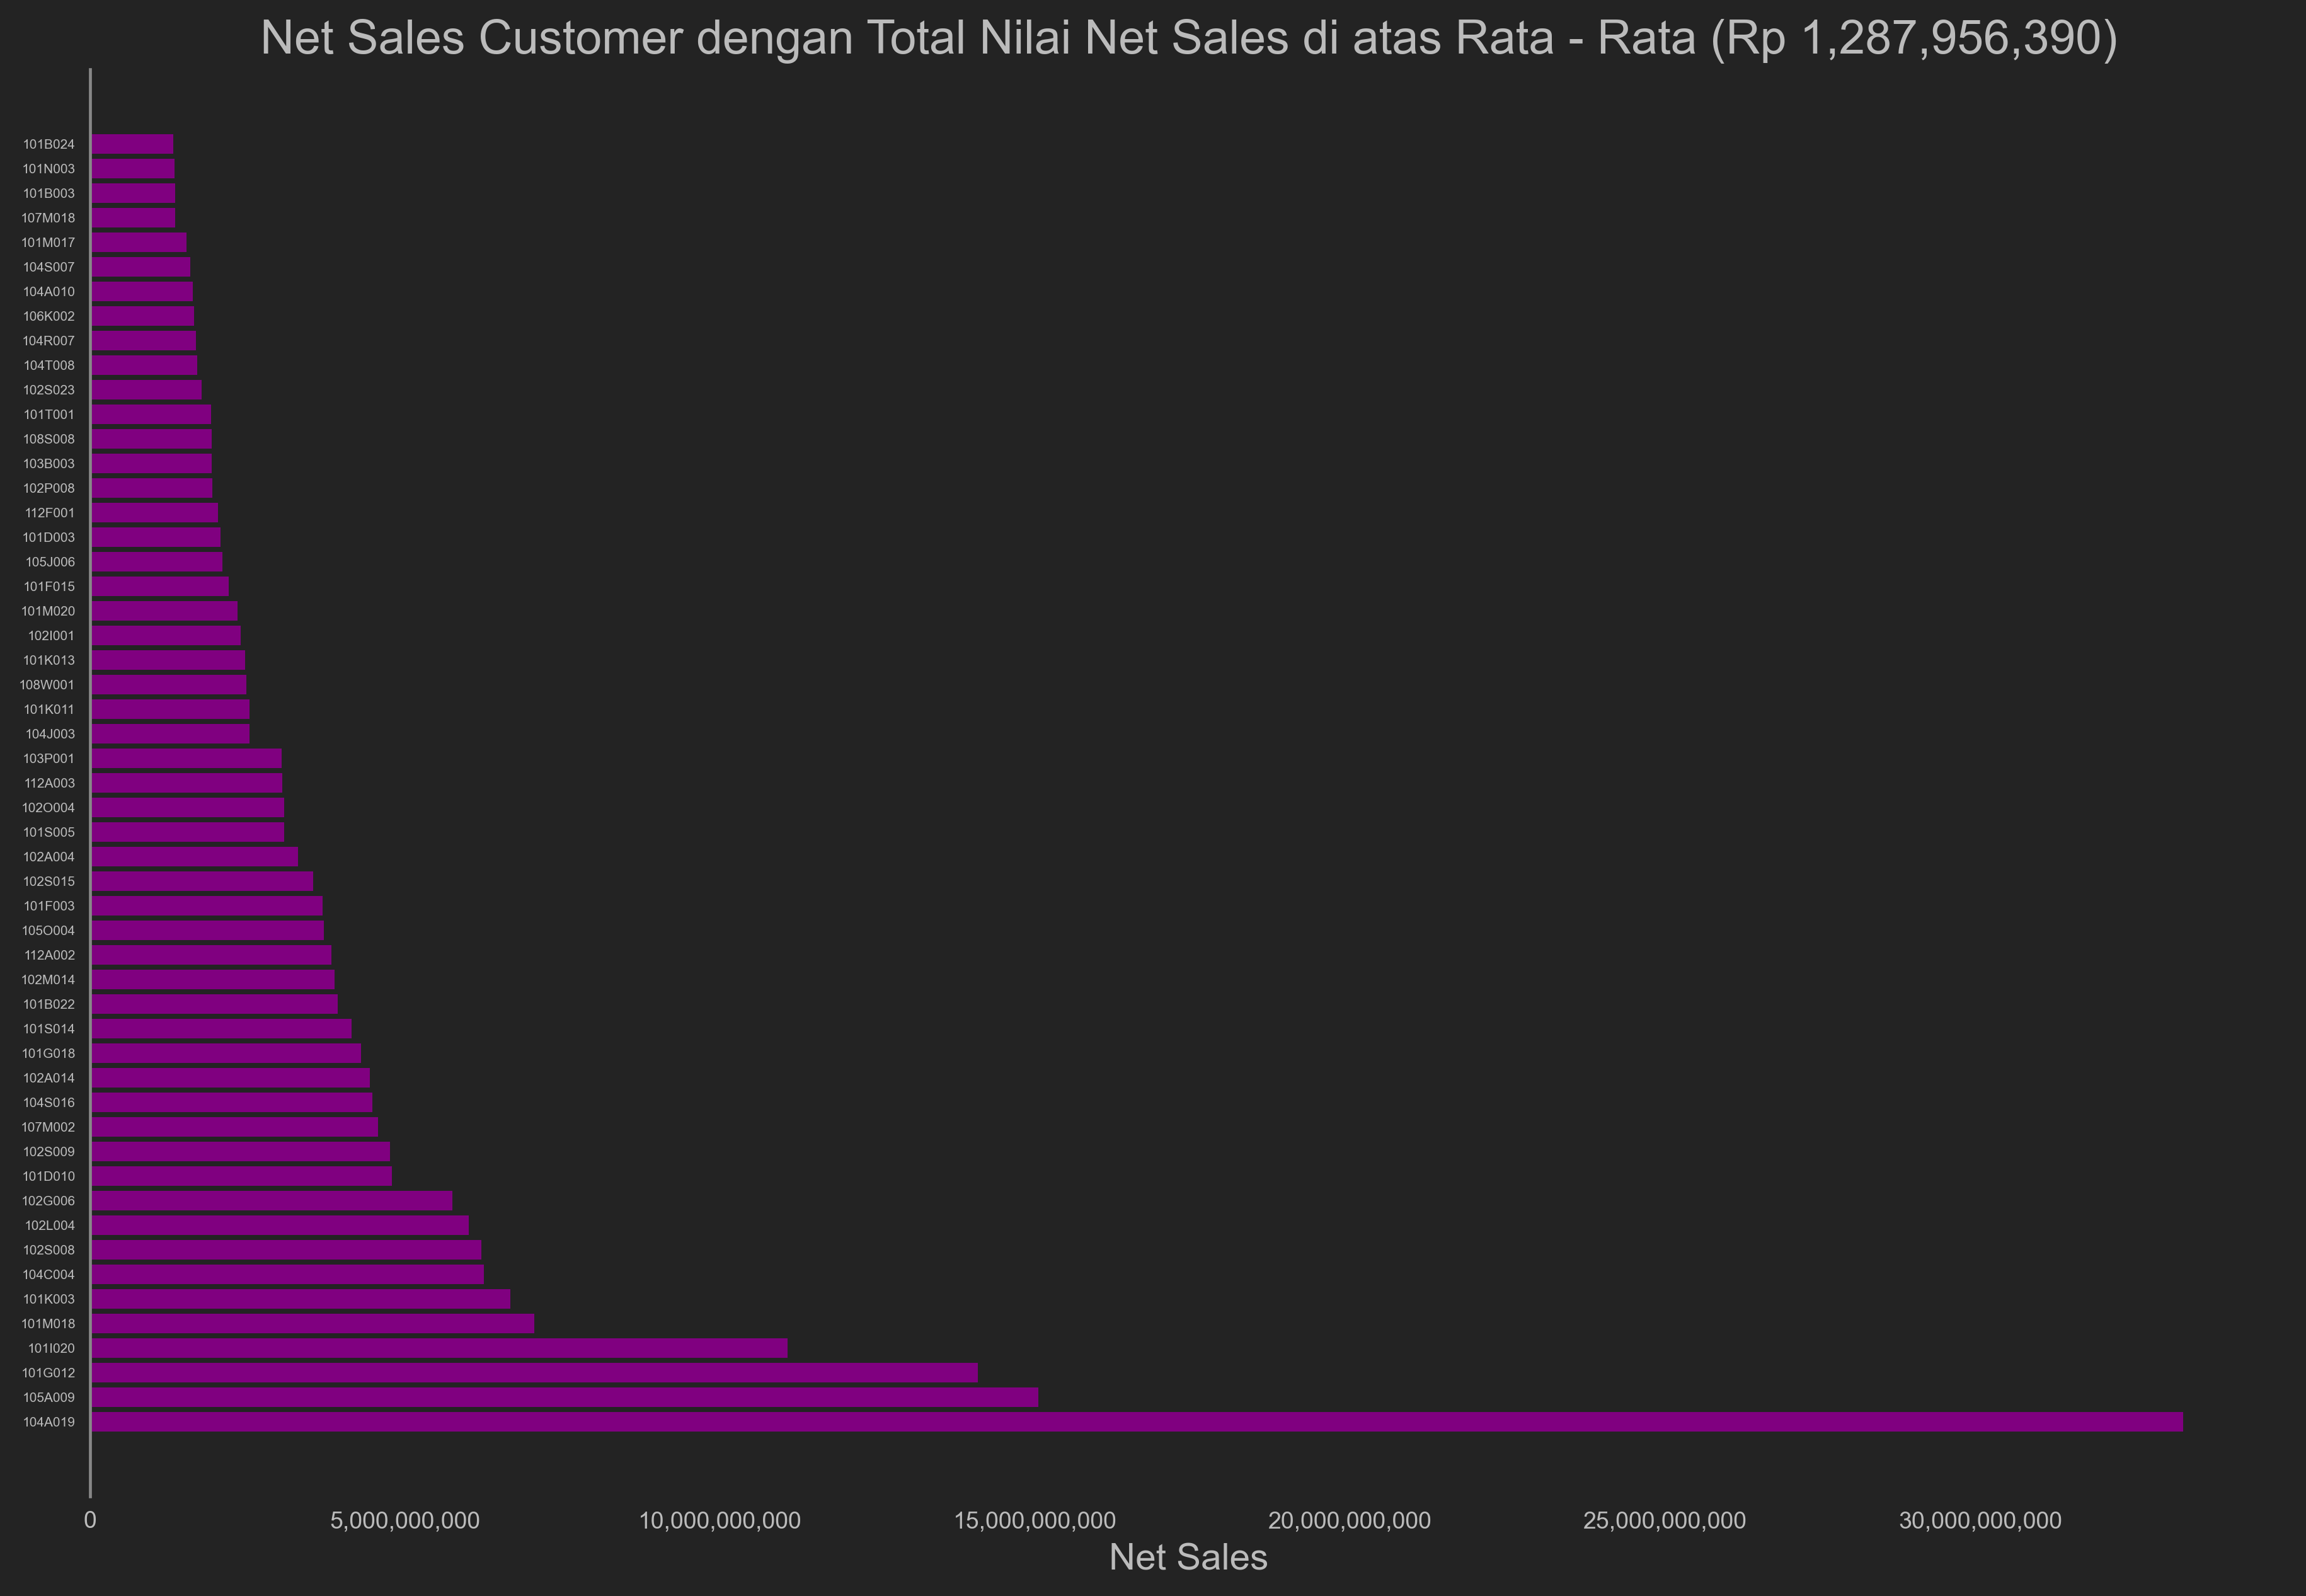

In [75]:
format_float = "{:,.0f}".format

plt.figure(figsize=(15,10))
plt.barh(cust_diatas_rerata.index, cust_diatas_rerata['Net'], color='purple')
plt.xlabel("Net Sales", fontsize=14)
plt.title(f"Net Sales Customer dengan Total Nilai Net Sales di atas Rata - Rata (Rp {format_float(net_berdasar_cust['Net'].mean())})", fontsize=18)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)
plt.yticks(fontsize=5)
plt.xticks(fontsize=9)
plt.show()

### I.3 Pengelompokan dan penjumlahan Net Sales berdasarkan Top 2 Customer dan Tingkat Diskon

In [83]:
net_berdasar_disc_cust = data_terpilih[['Id Cust', 'discount', 'Net']].groupby(['Id Cust', 'discount']).sum()
print(net_berdasar_disc_cust.iloc[net_berdasar_disc_cust.index.get_level_values('Id Cust') == '104A019'])
print(net_berdasar_disc_cust.iloc[net_berdasar_disc_cust.index.get_level_values('Id Cust') == '105A009'])

                               Net
Id Cust discount                  
104A019 0.30      1,949,312,400.00
        0.33     13,182,833,838.00
        0.35      1,303,863,600.00
        0.38      1,399,543,112.00
        0.40         42,273,240.00
        0.41        133,858,764.00
        0.45        169,308,040.00
        0.49      1,003,719,618.00
        0.50      1,320,107,800.00
        0.57      3,743,983,780.00
        0.60      2,423,449,760.00
        0.65      4,429,151,440.00
        0.70         66,145,581.18
        0.70         32,847,805.62
        0.70      1,583,911,140.00
        0.75         21,601,437.12
        0.75        274,068,233.46
        0.80        135,878,120.00
                              Net
Id Cust discount                 
105A009 0.30     2,982,084,420.00
        0.33     9,876,919,436.00
        0.35       786,464,250.00
        0.38     1,046,513,004.00
        0.40       162,927,720.00
        0.41       181,879,776.00
        0.60        16,790,4

In [84]:
disc_rerata_cust = data_terpilih[['Id Cust', 'Quantity', 'Bruto', 'Net']].groupby(['Id Cust']).sum()
disc_rerata_cust['rerata_disc'] = (disc_rerata_cust['Bruto'] - disc_rerata_cust['Net']) / disc_rerata_cust['Bruto']
disc_rerata_cust['rerata_spending'] = (disc_rerata_cust['Bruto'] / disc_rerata_cust['Quantity'])
disc_rerata_cust.sort_values(by='rerata_disc', ascending=False)
disc_rerata_cust

Quantity             Bruto               Net  rerata_disc  \
Id Cust                                                                
1.01E+07     707.00    259,268,800.00    183,149,668.00         0.29   
1.01E+08      30.00     35,994,000.00     28,795,200.00         0.20   
1.02E+11   3,246.00    819,892,400.00    545,388,465.00         0.33   
1.04E+04     286.00    102,802,800.00     67,507,106.00         0.34   
1.04E+07   1,664.00    642,443,200.00    426,961,036.00         0.34   
...             ...               ...               ...          ...   
112H001       29.00      8,994,200.00      5,256,980.00         0.42   
112K006    2,452.00    714,327,200.00    207,432,790.00         0.71   
112P007       15.00     17,997,000.00     14,397,600.00         0.20   
113C001    1,445.00    790,695,400.00    123,807,370.00         0.84   
220P001  233,006.00 78,230,780,699.94 33,135,725,178.50         0.58   

          rerata_spending  
Id Cust                    
1.01E+07       366,716.83  
1.01E+08     1,199,800.00  
1.02E+11       252,585.46  
1.04E+04       359,450.35  
1.04E+07       386,083.65  
...                   ...  
112H001        310,144.83  
112K006        291,324.31  
112P007      1,199,800.00  
113C001        547,194.05  
220P001        335,745.78  

[245 rows x 5 columns]

In [85]:
disc_rerata_cust.nunique()

Quantity           235
Bruto              245
Net                245
rerata_disc        227
rerata_spending    240
dtype: int64

In [86]:
disc_rerata_cust['rerata_disc'].unique()

array([2.93591562e-01, 2.00000000e-01, 3.34804829e-01, 3.43333975e-01,
       3.35410452e-01, 3.31586163e-01, 2.70000000e-01, 3.15000000e-01,
       5.03207417e-01, 3.29172399e-01, 3.25843058e-01, 3.29517157e-01,
       3.30067156e-01, 5.45318773e-01, 2.89962713e-01, 3.32896155e-01,
       2.94814753e-01, 2.84941811e-01, 3.45545442e-01, 4.46157268e-01,
       2.86238317e-01, 3.19657958e-01, 3.54753737e-01, 3.31813172e-01,
       3.41523433e-01, 5.12883589e-01, 6.15445864e-01, 5.84273382e-01,
       3.42372689e-01, 2.73601554e-01, 3.40308806e-01, 3.78865138e-01,
       4.32196055e-01, 3.07290696e-01, 3.13444267e-01, 3.93617366e-01,
       3.04377860e-01, 3.18983019e-01, 6.46465437e-01, 3.23639969e-01,
       3.17560398e-01, 4.12216857e-01, 3.25209021e-01, 3.32621932e-01,
       3.29120679e-01, 3.00081628e-01, 3.24941504e-01, 3.30000000e-01,
       2.96548897e-01, 3.38971314e-01, 2.90000000e-01, 3.20000000e-01,
       3.73863448e-01, 3.20179980e-01, 3.31896484e-01, 6.07961719e-01,
      

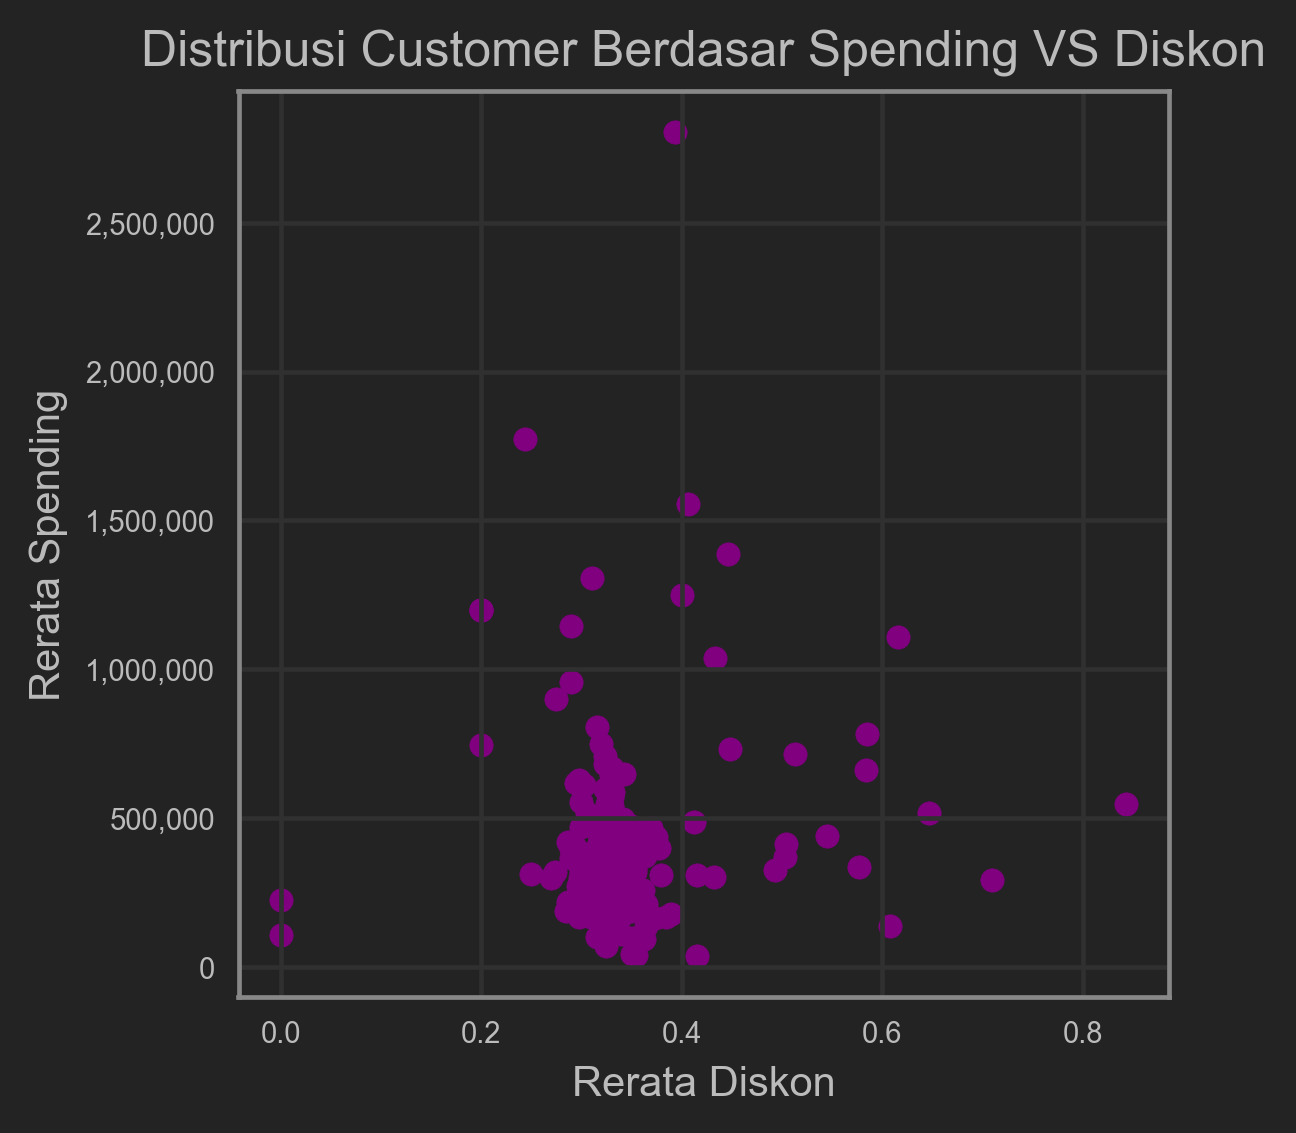

In [87]:
plt.figure(figsize=(4, 4))
plt.scatter(disc_rerata_cust['rerata_disc'], disc_rerata_cust['rerata_spending'], c='purple')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Distribusi Customer Berdasar Spending VS Diskon', fontsize=12)
plt.xlabel('Rerata Diskon', fontsize=10)
plt.ylabel('Rerata Spending', fontsize=10)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.show()

In [88]:
net_berdasar_cust

Net
Id Cust                   
1.01E+07    183,149,668.00
1.01E+08     28,795,200.00
1.02E+11    545,388,465.00
1.04E+04     67,507,106.00
1.04E+07    426,961,036.00
...                    ...
112H001       5,256,980.00
112K006     207,432,790.00
112P007      14,397,600.00
113C001     123,807,370.00
220P001  33,135,725,178.50

[245 rows x 1 columns]

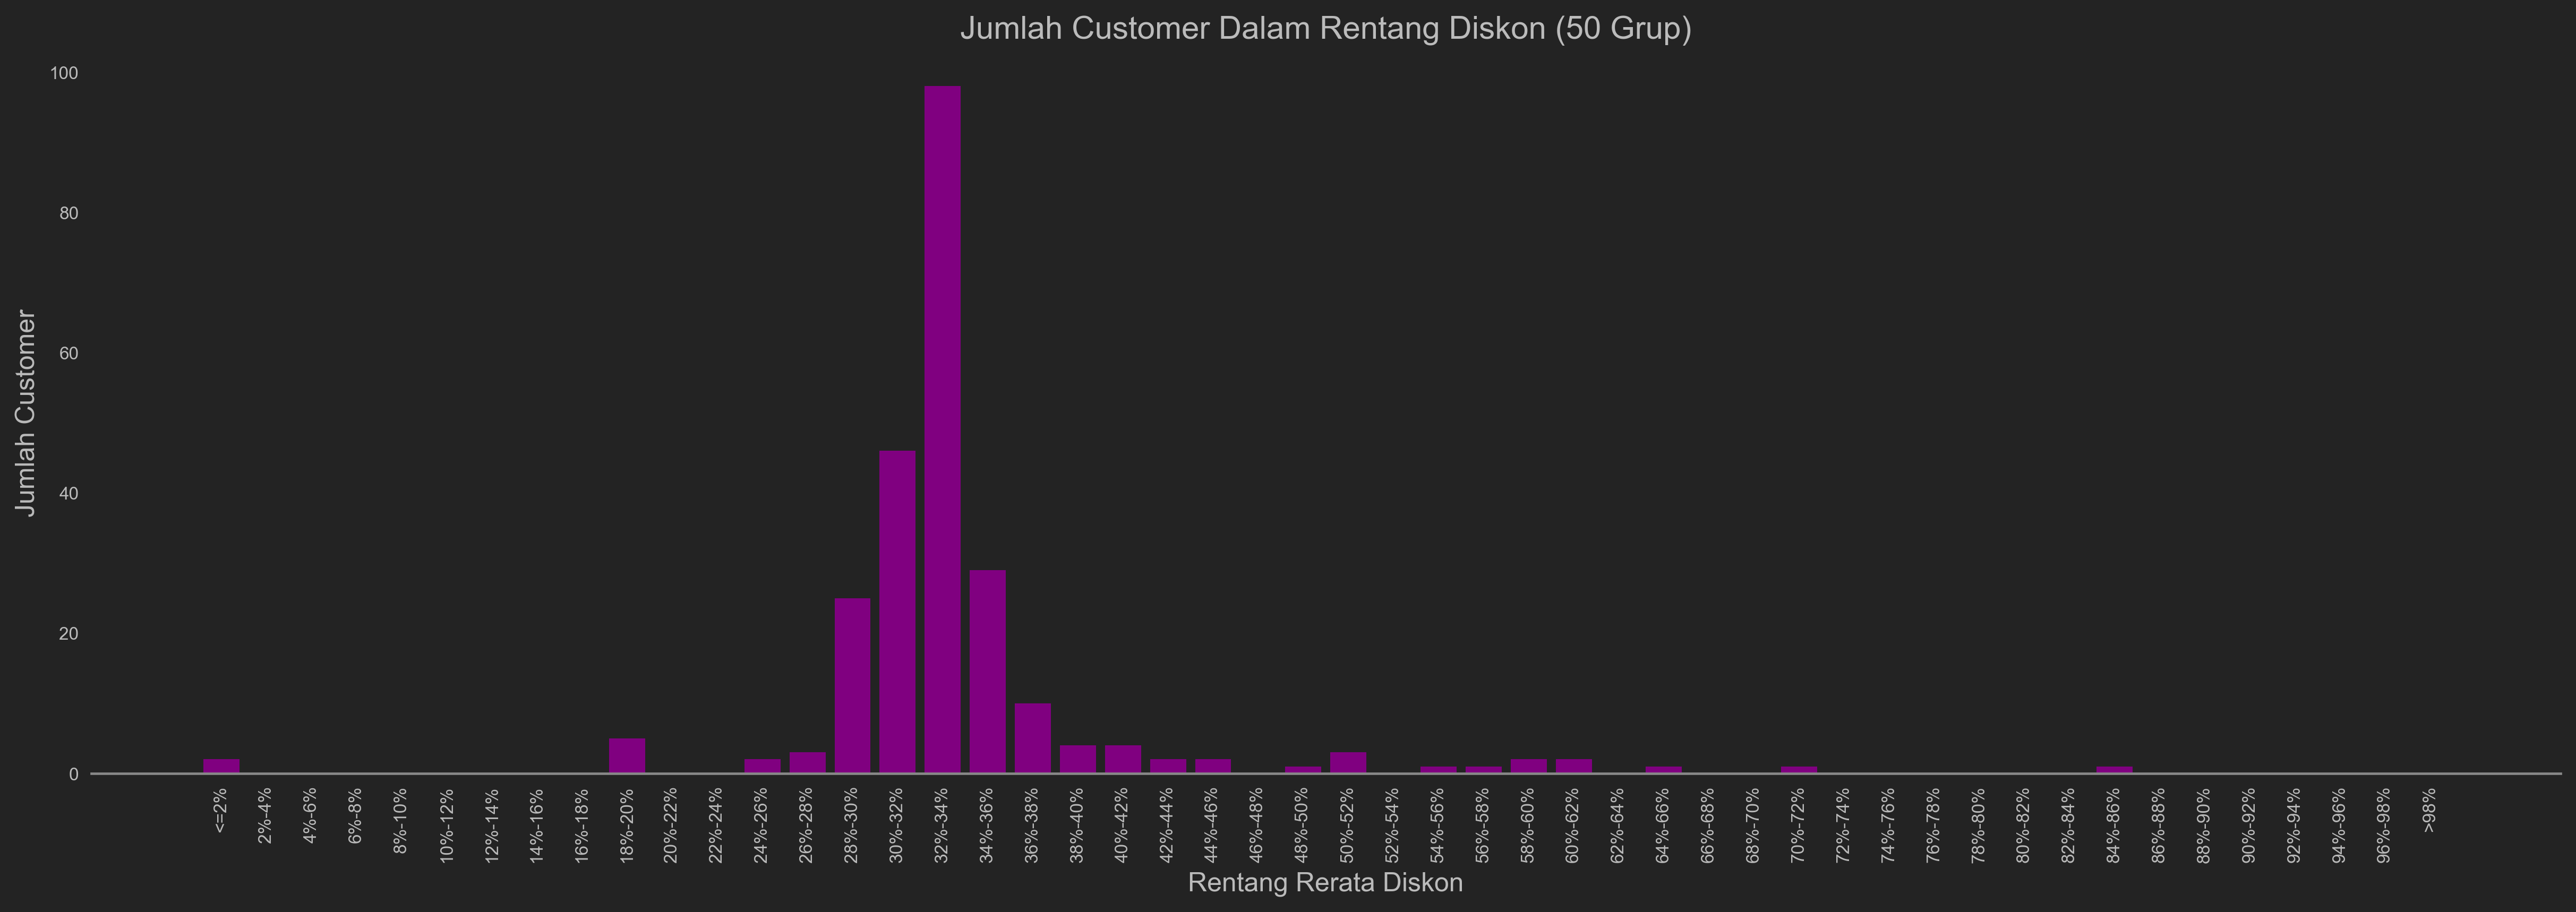

In [89]:
# pengelompokan berdasar range diskon
n_grup = 50

x = []
y = []

for numerator in range(n_grup):
    if numerator == 0:
        x.append("<=" + format((numerator + 1) / n_grup, '.0%'))
        y.append(len(disc_rerata_cust[disc_rerata_cust['rerata_disc'] <= (numerator + 1) / n_grup]))
    elif numerator + 1 == n_grup:
        x.append(">" + format((numerator) / n_grup, '.0%'))
        y.append(len(disc_rerata_cust[disc_rerata_cust['rerata_disc'] > (numerator) / n_grup]))
    else:
        x.append(format((numerator) / n_grup, '.0%') + "-" + format((numerator + 1) / n_grup, '.0%'))
        y.append(len(disc_rerata_cust[(disc_rerata_cust['rerata_disc'] > numerator / n_grup) & (disc_rerata_cust['rerata_disc'] <= (numerator + 1) / n_grup)]))

plt.figure(figsize=(20, 6))
plt.bar(x,y, color='purple')
plt.grid(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title(f'Jumlah Customer Dalam Rentang Diskon ({n_grup} Grup)')
plt.xlabel("Rentang Rerata Diskon", fontsize=12)
plt.ylabel("Jumlah Customer", fontsize=12)
plt.xticks(fontsize=8, rotation='vertical')
plt.yticks(fontsize=8)
plt.show()

In [90]:
scaler = MinMaxScaler()
net_berdasar_cust_scaled = scaler.fit_transform(net_berdasar_cust)

In [91]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(net_berdasar_cust_scaled)

KMeans(n_clusters=3)

In [92]:
y_kmeans = kmeans.predict(net_berdasar_cust_scaled)

In [93]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1])

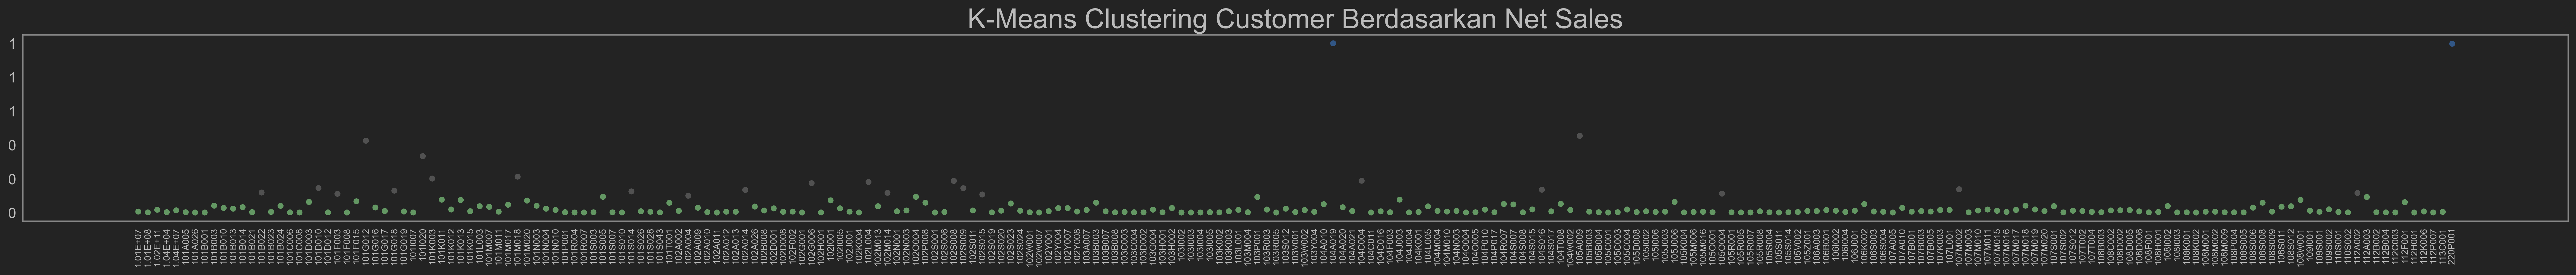

In [94]:
plt.figure(figsize=(40, 3))
plt.scatter(net_berdasar_cust.index, net_berdasar_cust_scaled, c=y_kmeans, s=25, cmap='Accent', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(False)
plt.xticks(fontsize=8, rotation='vertical')
plt.title('K-Means Clustering Customer Berdasarkan Net Sales', fontsize=24)
plt.show()